A few galaxies cutouts in the Virgo filament sample feature one central galaxy with one or more off-center foreground galaxies. For a fraction of these cutouts, GALFIT incorrectly identifies the galaxy to model as the off-centered lurker. To try to remedy this error, I will have a go at finding the central pixel of each faulty-modelled cutout and fix the xc and yc input parameters accordingly. Such is what this notebook will test.

In [1]:
#NGC4649

In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy.wcs import WCS
from astropy.io import fits
from astropy.io import ascii

In [3]:
homedir = os.getenv("HOME")
vfmain = Table.read(homedir+'/github/research/sample_main_two.fits')
os.chdir(homedir+'/github/WISE_232_psf')
%run ~/github/research/run_galfit.py

/Users/k215c316/opt/anaconda3/lib/python3.8/site-packages/pyds9.py:94: UserWarning: Can't locate the X11 DS9 executable in your PATH or the Aqua SAOImage DS9 app in /Applications, $HOME or $HOME/Applications. Please configure your PATH or make SAOImage DS9 available in a known location.
  warnings.warn(ds9_warning)


In [6]:
#find "test" galaxy with off-center model, NGC 4649

for i in range(0,len(vfmain)):
    if vfmain['objname'][i] == 'NGC4649':
        print(i)

158


In [18]:
#isolate in array of two galaxies, since my routine requires more than one galaxy as input :}
#concentrate on only the first mosaic, if you would.
#vf=vfmain[158:160]
vf = vfmain[158]

In [23]:
tab[0]

xc,xc_err,yc,yc_err,mag,mag_err,re,re_err,nsersic,nsrsic_err,BA,BA_err,PA,PA_err,sky,sky_err,error,chi2nu,prefix,success_flag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,int64
255.6926,0.0356,254.7487,0.0324,4.2295,0.0037,25.658,0.1279,0.9898,0.0056,0.3683,0.001,-47.6139,0.1188,-19.0207,2.2527,0.0,4.043,VFID4957-MESSIER060,1


In [27]:
g = galaxy(vf['RA'],vf['DEC'],vf['radius'],name=vf['prefix'],band='3')

In [37]:
#read in table with sersic parameters, 
#midpoint of image is 428/2, 427/2

tab = ascii.read(homedir+'/github/WISE_232_psf/off_center_param.txt')
sersic_parameters = [428/2,427/2,tab['mag'][0],tab['re'][0],tab['nsersic'][0],tab['BA'][0],tab['PA'][0]]

wise image size =  406
downloading unwise images
http://unwise.me/cutout_fits?version=allwise&ra=190.91650&dec=11.55271&size=406&bands=3
['unwise-1915p121-w3-img-m.fits', 'unwise-1915p121-w3-invvar-m.fits.gz', 'unwise-1915p121-w3-n-m.fits.gz', 'unwise-1915p121-w3-std-m.fits.gz', 'unwise-1900p121-w3-img-m.fits', 'unwise-1900p121-w3-invvar-m.fits.gz', 'unwise-1900p121-w3-n-m.fits.gz', 'unwise-1900p121-w3-std-m.fits.gz']
running swarp to combine multiple unwise images
(428, 427)
self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits
sersic n, fitsersicn =  0.9898 1
BA, fitBA =  0.3683 1
run the following:  galfit VFID4957-MESSIER060-unwise-w3-galfit.input.1Comp
1_XC  : 254.2502 +/- 0.0120
1_YC  : 253.3959 +/- 0.0102
1_MAG : 4.4762 +/- 0.0024
1_RE  : 10.6312 +/- 0.0339
1_N   : 0.9809 +/- 0.0035
1_AR  : 0.8720 +/- 0.0016
1_PA  : -68.0814 +/- 0.6704
2_SKY : 8.0624 +/- 1.7396
who's zoomin' who?


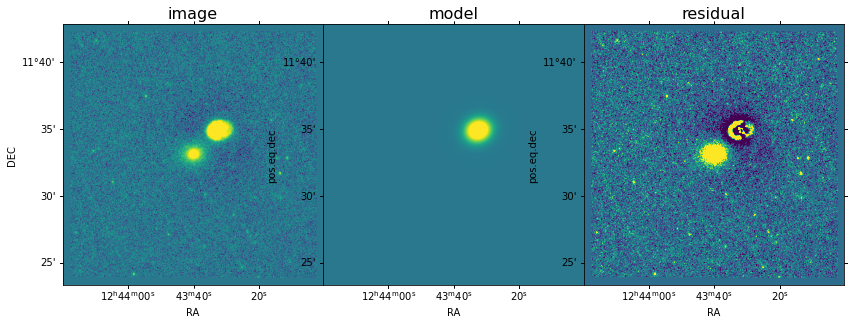

In [38]:
g.run_simple(convflag=False,sersic_start=sersic_parameters)

In [39]:
g.set_sersic_manual(xc=428/2,yc=427/2)

TypeError: set_sersic_manual() got an unexpected keyword argument 'xc'

In [42]:
help(print_fix_menu())

NameError: name 'print_fix_menu' is not defined

In [43]:
%run ~/github/virgowise/rungalfit.py

<Figure size 432x288 with 0 Axes>

In [47]:
galfit.fix_center(g)

NameError: name 'toggle' is not defined